# Block Release

This notebook contains the skeleton of the code to be used for the tasks.

## Imports

In [1]:
import pandas as pd
import requests
import seaborn as sn
import matplotlib.pyplot as plt

## Locations

In [2]:
# coordinates are latitude, longitude pairs
LOCATION_UNIVERSITY_PARK = (52.93726647677705, -1.1959384006396074)
LOCATION_JUBILEE_CAMPUS = (52.95232635429298, -1.1862643609249397)
LOCATION_NOTTINGHAM_CITY_CENTRE = (52.953, -1.149)

## API

You will need to add more API URLs here as needed to complete the stories.

In [3]:
API_STREET_CRIME = "https://data.police.uk/api/crimes-street/"

## Crimes Near University Park Campus

Example function which calculates the number of crimes within 1 mile of University Park campus.

In [4]:
def count_crimes_within_1_mile(
    lat: float, lon: float, year: int, month: int
) -> int:
    """Calculate number of crimes within 1 mile of a location for a date.

    Args:
        lat (float): Latitude of the location.
        lon (float): Longitude of the location.
        year (int): Year to find crimes.
        month (int): Month of the provided year to find crimes.

    Returns:
        int: Count of the crimes
    """
    url = (
        API_STREET_CRIME + f"all-crime?lat={lat}&lng={lon}&date={year}-{month}"
    )
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error retrieving data: {response.status_code}")


#print(count_crimes_within_1_mile(*LOCATION_UNIVERSITY_PARK, 2023, 1))

In [5]:
data = []
for i in range(1, 13):
    month_data =count_crimes_within_1_mile(*LOCATION_JUBILEE_CAMPUS, 2022,i)
    data = data + month_data

In [6]:
df = pd.DataFrame(data)

In [7]:
df.head()

,category,location_type,location,context,outcome_status,persistent_id,id,location_subtype,month
0,anti-social-behaviour,Force,"{'latitude': '52.960407', 'street': {'id': 106...",,None,,99102226,,2022-01
1,anti-social-behaviour,Force,"{'latitude': '52.960428', 'street': {'id': 106...",,None,,99102216,,2022-01
2,anti-social-behaviour,Force,"{'latitude': '52.960593', 'street': {'id': 106...",,None,,99102045,,2022-01
3,anti-social-behaviour,Force,"{'latitude': '52.955024', 'street': {'id': 106...",,None,,99102002,,2022-01
4,anti-social-behaviour,Force,"{'latitude': '52.945637', 'street': {'id': 106...",,None,,99102001,,2022-01


In [8]:
burglary = df.query("category == 'burglary'").reset_index(drop=True)

,Month,Number of Burglaries
0,Jan-2022,20
1,Feb-2022,35
2,Mar-2022,24
3,Apr-2022,16
4,May-2022,16
5,Jun-2022,24
6,Jul-2022,27
7,Aug-2022,16
8,Sep-2022,27
9,Oct-2022,37


Text(0, 0.5, 'Number of Burglary')

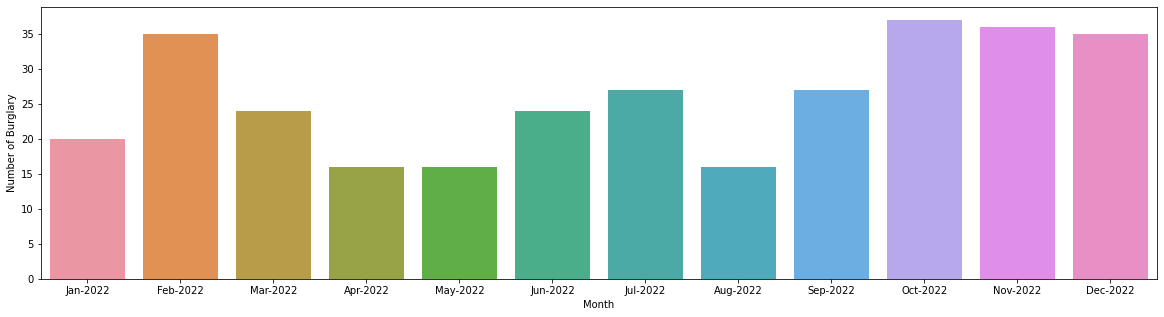

In [9]:
display(pd.DataFrame({
    'Month': pd.period_range(start='2022-01-01', end='2022-12-31', freq='M').strftime("%b-%Y"),
    'Number of Burglaries': burglary.month.value_counts().sort_index().values
}))


plt.figure(figsize=(20,5))
sn.barplot(x=pd.period_range(start='2022-01-01', end='2022-12-31', freq='M').strftime("%b-%Y"),
          y= burglary.month.value_counts().sort_index().values)
plt.xlabel("Month")
plt.ylabel("Number of Burglary")
